In [2]:
import numpy as np
from pylab import figure, plot, xlabel, ylabel, title
from numpy import math,  cos, sin,pi,fft,arange,transpose,sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [25]:
fs = 3.05e3  # Switching frequency is 3 kHz
Ts = 1/(fs) #1 / (2 * fs) #half period
mm= np.linspace(0.01, 1, 101)  # mi as a array 0 - 1
mi = sqrt(3)*mm/2 #Normalised with max m
angle =  math.pi / 12 # math.pi / 4 #30 degrees

# Find the index corresponding to mi = 0.8
mi_target = 0.7

In [26]:
def spacevectortimes(vref, sectorangle, subcycleperiod):
    t2 = vref * subcycleperiod * (math.sin(sectorangle) / math.sin(math.pi / 3))
    t1 = vref * subcycleperiod * (math.sin(math.pi / 3 - sectorangle) / math.sin(math.pi / 3))
    t0 = subcycleperiod - t2 - t1
    return t2, t1, t0


def fluxripplevector(sectorangle, t_2, t_1, tz, mi):
    qz = -(mi) * tz
    q1 = (mi*cos(sectorangle)-mi)*t_1
    q2 = (mi*cos((math.pi/3)-(sectorangle))-mi)*t_2
    d = sin(sectorangle)*t_1
    return qz, q1, q2, d

def phi(qz, q2, q1, d, t2, t1, tz, subcycleperiod):
    phisq012 = (((1/3)*(qz**2)*(tz/subcycleperiod))+((1/3)*((qz**2)+(qz*(qz+q1))+((qz+q1)**2))*(t1/subcycleperiod))+((1/3)*((qz+q1)**2)*(t2/subcycleperiod))+((1/3)*(d**2)*((t1+t2)/subcycleperiod)))
    phisq721 = ((1/3)*(qz**2)*(tz/subcycleperiod))+((1/3)*((qz**2)+(qz*(qz+q2))+((qz+q2)**2))*(t2/subcycleperiod))+((1/3)*((qz+q2)**2)*(t1/subcycleperiod))+((1/3)*(d**2)*((t1+t2)/subcycleperiod))
    Rphisq012 = sqrt(phisq012)*100
    Rphisq721 = sqrt(phisq721)*100
    return Rphisq012, Rphisq721

def find_intersection(mi_values, y_values, mi_target):
    y_target = np.interp(mi_target, mi_values, y_values)
    return y_target

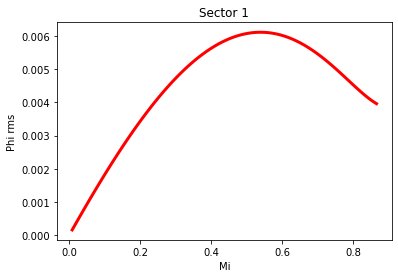

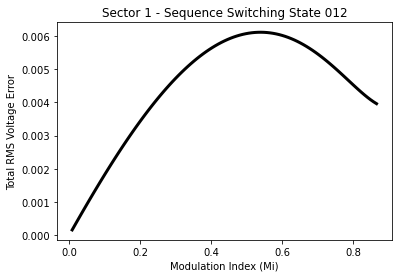

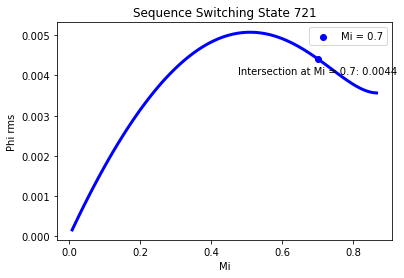

In [30]:
def main():
    phi012_rms = []
    phi721_rms = []
    phi_rms =[]
    for m in mi:
       
        
        t_2, t_1, tz = spacevectortimes(m, angle, Ts)
        qz, q1, q2, d = fluxripplevector(angle, t_2, t_1, tz, m)
        Rphisq012, Rphisq721 = phi(qz, q1, q2, d, t_2, t_1, tz, Ts)


        phi012_rms.append(Rphisq012)
        phi721_rms.append(Rphisq721)
 
        # Append values based on sector angle range
        if 0 <= angle <= math.pi/6:
            phi_rms.append(Rphisq012)
            
        elif math.pi/6 < angle <= math.pi/3:
            phi_rms.append(Rphisq721)
            
           
    intersection_y = find_intersection(mi, phi721_rms, mi_target)
    intersection_y2 = find_intersection(mi, phi012_rms, mi_target)
        
    plt.figure(1)
    plt.plot(mi, phi_rms, lw=3, color='red')
    plt.xlabel("Mi")
    plt.ylabel("Phi rms")
    plt.title("Sector 1")

    # Mark the intersection point on the plot
#     plt.scatter(mi_target, intersection_y, c='blue', label=f'Mi = {mi_target}')
#     plt.annotate(f'Intersection at Mi = {mi_target}: {intersection_y:.4f}', (mi_target, intersection_y), textcoords="offset points", xytext=(0, 10), ha='center')
#     plt.legend()
    
  
    
    plt.figure(2)
    plt.plot(mi, phi012_rms, lw=3, color='black')
    plt.xlabel("Modulation Index (Mi)")
    plt.ylabel("Total RMS Voltage Error")
    plt.title("Sector 1 - Sequence Switching State 012")

   
#     plt.scatter(mi_target, intersection_y2, c='blue', label=f'Mi = {mi_target}')
#     plt.annotate(f'Intersection at Mi = {mi_target}: {intersection_y2:.4f}', (mi_target, intersection_y2), textcoords="offset points", xytext=(0, -15), ha='center')
#    plt.legend()


    plt.figure(3)
    plt.plot(mi, phi721_rms, lw=3, color='blue')
    plt.xlabel("Mi")
    plt.ylabel("Phi rms")
    plt.title("Sequence Switching State 721")

   
    plt.scatter(mi_target, intersection_y, c='blue', label=f'Mi = {mi_target}')
    plt.annotate(f'Intersection at Mi = {mi_target}: {intersection_y:.4f}', (mi_target, intersection_y), textcoords="offset points", xytext=(0, -15), ha='center')
    plt.legend()
    
    

    
    plt.show()

  
       

if __name__ == "__main__":
    main()

In [24]:
Vdc = 2/pi
a = (2/3)*Vdc

In [57]:
vr = complex(1,0)*a
vl = complex(cos(pi/3), sin(pi/3))*a


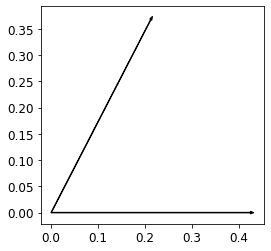

In [19]:
plt.figure(100, figsize = (4,4))
plt.rc('font', size =12)
plt.arrow(0,0,vr.real,vr.imag, fc = 'k', ec = "k", head_width = 0.005, lw =1)
plt.arrow(0,0,vl.real,vl.imag, fc = 'k', ec = "k", head_width = 0.005, lw =1)